# PyALE with classification models

In this notenook a small example of a workaround to see the effect of features on classification models.

The idea is to see the effect of a feature on the predicted probability of a specific class, by using a dummy model that has a predict method, which returns the probabilty of a specific class

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = pd.Categorical.from_codes(iris.target, iris.target_names)
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [4]:
##### Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=5, random_state=873)
clf.fit(X, y)

RandomForestClassifier(n_estimators=5, random_state=873)

In [5]:
clf.predict_proba(X)[110:120, :]

array([[0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8]])

In [6]:
class clf_dummy():
    def predict(df):
        return(clf.predict_proba(df)[:, 2])

In [7]:
import matplotlib.pyplot as plt 
from PyALE import ale

PyALE._ALE_generic:INFO: Continuous feature detected.


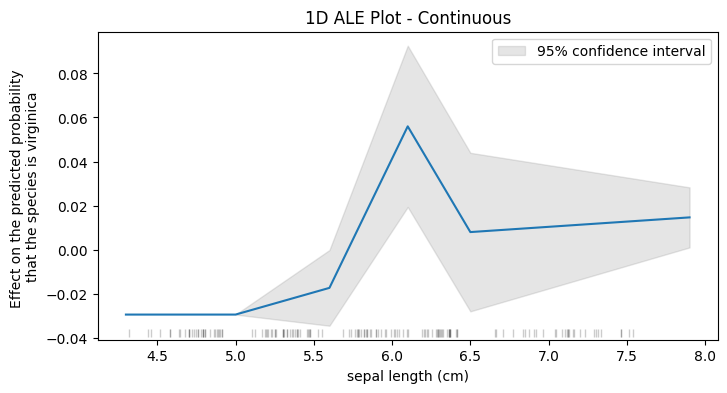

In [8]:
feat_eff = ale(X=X, model=clf_dummy, feature=['sepal length (cm)'], grid_size=5)
plt.ylabel('Effect on the predicted probability \nthat the species is virginica')
plt.show()

In [9]:
feat_eff

,eff,size,lowerCI_95%,upperCI_95%
sepal length (cm),,,,
4.3,-0.029491,0.0,NaN,NaN
5.0,-0.029491,32.0,-0.029491,-0.029491
5.6,-0.017370,33.0,-0.034553,-0.000186
6.1,0.055964,30.0,0.019360,0.092567
6.5,0.007964,25.0,-0.028022,0.043949
7.9,0.014630,30.0,0.000995,0.028265
